# Montreal Temperature Spiral

The goal of this project was to create an animated spiral of Montreal's variation in temperature from 1872 to 2019.

**Background:** [Ed Hawkins](http://www.met.reading.ac.uk/~ed/home/index.php), a climate scientist, unveiled [an animated visualization](http://www.climate-lab-book.ac.uk/spirals/) in 2017 which captivated the world. This visualization showed the deviations of the global average temperature from 1850 to 2017. It was reshared millions of times over Twitter and Facebook and a version of it was even shown at the opening ceremony for the Rio Olympics.

This animation was created with the help of [an article on Dataquest.io](https://www.dataquest.io/blog/climate-temperature-spirals-python/) written by Srini Kadamati.

Historical weather data was retrieved from [Environment Canada's website](https://climate.weather.gc.ca/). Recordings from the Montreal McGill Station (Dr. Penfield Street/Redpath Street) provided monthly weather data from 1872 to 1993 while recordings from the Montreal McTavish Station (McTavish Street/Dr. Penfield Street), just 700 meters away, provided daily weather data from 1994 to 2019. Combining data from both sources may constitute a source of error, but with the unavailability of continuous weather recordings from 1872 to 2019 from a single station, there appears to be no alternative solution.

### Reading in Data

In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Reading in mcgill weather data
mcgill_temp = pd.read_csv('en_climate_monthly_QC_7025280_1871-1993_P1M.csv')

# Reading in mctavish weather data from all downloaded years
mctavish_temp = pd.concat(map(pd.read_csv, glob.glob('en_climate_daily*.csv')))

# Exploring mcgill data
mcgill_temp.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.58,45.5,MONTREAL MCGILL,7025280,1871-01,1871,1,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.58,45.5,MONTREAL MCGILL,7025280,1871-02,1871,2,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.58,45.5,MONTREAL MCGILL,7025280,1871-03,1871,3,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,-73.58,45.5,MONTREAL MCGILL,7025280,1871-04,1871,4,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
4,-73.58,45.5,MONTREAL MCGILL,7025280,1871-05,1871,5,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Exploring mctavish data
mctavish_temp.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.58,45.5,MCTAVISH,7024745,2013-01-01,2013,1,1,NaN,-1.2,...,NaN,M,0.0,NaN,NaN,NaN,1.0,NaN,39,NaN
1,-73.58,45.5,MCTAVISH,7024745,2013-01-02,2013,1,2,NaN,-12.6,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
2,-73.58,45.5,MCTAVISH,7024745,2013-01-03,2013,1,3,NaN,-12.2,...,NaN,M,1.2,NaN,NaN,NaN,NaN,NaN,<31,NaN
3,-73.58,45.5,MCTAVISH,7024745,2013-01-04,2013,1,4,NaN,0.0,...,NaN,M,3.4,NaN,NaN,NaN,26.0,NaN,35,NaN
4,-73.58,45.5,MCTAVISH,7024745,2013-01-05,2013,1,5,NaN,0.2,...,NaN,M,0.0,NaN,NaN,NaN,2.0,NaN,33,NaN


### Treating Columns

In [3]:
# Determining which columns to get rid of in mcgill data
mcgill_temp.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Mean Max Temp (°C)',
       'Mean Max Temp Flag', 'Mean Min Temp (°C)', 'Mean Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Extr Max Temp (°C)',
       'Extr Max Temp Flag', 'Extr Min Temp (°C)', 'Extr Min Temp Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow Grnd Last Day (cm)', 'Snow Grnd Last Day Flag',
       'Dir of Max Gust (10's deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [4]:
# Keeping only year, month and mean temp columns
mcgill_temp = mcgill_temp[['Year', 'Month', 'Mean Temp (°C)']]

# Determining which columns to get rid of in mctavish data
mctavish_temp.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [5]:
# Keeping only year, month and mean temp columns
mctavish_temp = mctavish_temp[['Year', 'Month', 'Mean Temp (°C)']]

# Renaming columns for both dataframes
mcgill_temp.columns = ['year', 'month', 'mean_temp']
mctavish_temp.columns = ['year', 'month', 'mean_temp']

### Treating Rows

In [6]:
# Exploring missing temperature data in mcgill dataframe
mcgill_temp[mcgill_temp['mean_temp'].isna()]

,year,month,mean_temp
0,1871,1,NaN
1,1871,2,NaN
2,1871,3,NaN
3,1871,4,NaN
4,1871,5,NaN
5,1871,6,NaN
35,1873,12,NaN
1379,1985,12,NaN
1401,1987,10,NaN
1403,1987,12,NaN


There seems to be missing data for most of the months in years 1871 and 1993. We could impute the 1993 data with recordings from a different station, but the closest station that was in working order in 1993 was several kilometers away so it might be better to simply drop that date. This can be decided during the next iteration of the Montreal temperature spiral project.

In [7]:
# Dropping missing years
mcgill_temp = mcgill_temp.drop(mcgill_temp[mcgill_temp['year'] == 1871].index)
# To check for next iteration:
# .drop(mcgill_temp[mcgill_temp['year'] == 1993].index)

In [8]:
# Checking missing values in mctavish dataframe
mctavish_temp[mctavish_temp['mean_temp'].isna()]['year'].value_counts(dropna=False)

1995    296
1996    248
1994    225
1998     41
2014     37
2019     15
2017     14
1999     12
2018      8
2015      7
2016      6
2010      3
2009      3
2004      2
2003      2
1997      2
2013      1
2012      1
2001      1
2000      1
2006      1
Name: year, dtype: int64

In [9]:
# Aggregating data by month
mctavish_temp = mctavish_temp.groupby(['year', 'month']).agg(np.mean).reset_index()

# Checking months with misssing values
mctavish_temp[mctavish_temp['mean_temp'].isna()]

,year,month,mean_temp
0,1994,1,NaN
1,1994,2,NaN
2,1994,3,NaN
3,1994,4,NaN
4,1994,5,NaN
5,1994,6,NaN
15,1995,4,NaN
16,1995,5,NaN
17,1995,6,NaN
18,1995,7,NaN


We notice that there are many missing values for the years 1994, 1995 and 1996 which will not allow us to complete correct spirals for those years. We can also decide on what action to take regarding those dates during the next iteration of the Montreal temperature spiral project.

### Merging Temperature Data

We can now concatenate the data from the McGill and McTavish weather stations.

In [10]:
# Concatenating mcgill and mctavish data
temp_data = pd.concat([mcgill_temp, mctavish_temp], ignore_index = True)

### Creating Comparative Column for Temperatures

In order to compare the temperature, we should compute the mean of the temperatures from 1872 to 1900 and subtract that value from the average temperatures in the entire dataset. This will allow to compare the variations in temperature with the baseline mean temperature from 1872 to 1900.

In [11]:
# Subracting baseline mean monthly temperature from each corresponding monthly temperatures
for i in range(1,13): # months 1 inclusive to 13 exclusive
    temp_data.loc[temp_data['month'] == i, 'mean_temp'] -= temp_data[temp_data['month'] == i]['mean_temp'].iloc[:29].mean() # iloc 29 selects years 1872 to 1900 

### Preparing Data for Polar Plotting

Each spiral that will be plotted contains temperature values for a single year. This means that we need to subset the data by year and use the following coordinates:

- r: temperature value for a given month, adjusted to contain **no negative values**. Matplotlib supports plotting negative values, but we want -0.1 to be closer to the center than 0.1 (which isn’t the default matplotlib behavior). We also want to leave some space around the origin of the plot for displaying the year as text.

- theta: 12 equally spaced angle values that span from 0.5*pi to -1.5*pi.

We can start plotting the data for the year 1872, then scale up to all years.

To adjust the data to contain no negative temperature values, we need to first calculate the minimum temperature value:

In [12]:
# Calculating minimum value
temp_data['mean_temp'].min()

-6.635714285714286

We can add 7 to all temperature values, so they can be positive and still leave some space for text to be displayed around the origin.

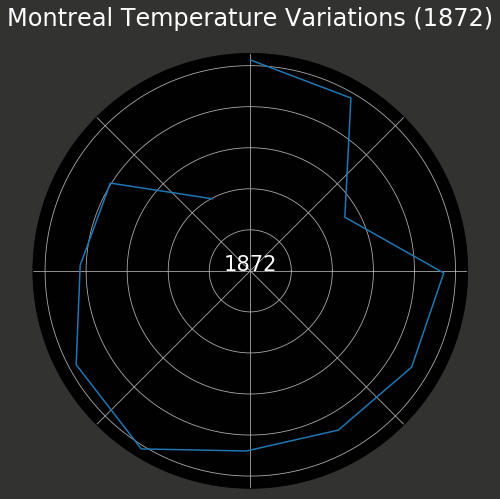

In [13]:
# Subsetting data for 1872
temp_1872 = temp_data[temp_data['year'] == 1872]

# To use polar system, we need to set the projection parameter to "polar" when creating it
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection = 'polar')

# Setting coordinates
r = temp_1872['mean_temp'] + 7 # plotting temperature (y axis)
theta = np.linspace(0.5*np.pi, (-1.5+2/13)*np.pi, 12) # 12 equally spaced values

# Hiding tick labels 
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])

# Setting foreground colour
fig.set_facecolor("#323331") # gray

# Setting background colour
ax1.set_facecolor('#000100') # black

# Setting title
ax1.set_title("Montreal Temperature Variations (1872)", color = 'white', fontdict = {'fontsize': 24})

# Adding text in center
ax1.text(0, 0, "1872", color = 'white', size = 21, ha = 'center')

# Displaying plot
ax1.plot(theta, r)

### Plotting Remaining Years

In [14]:
# Calculating max value in temperature data
temp_data['mean_temp'].max()

9.744827586206895

/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


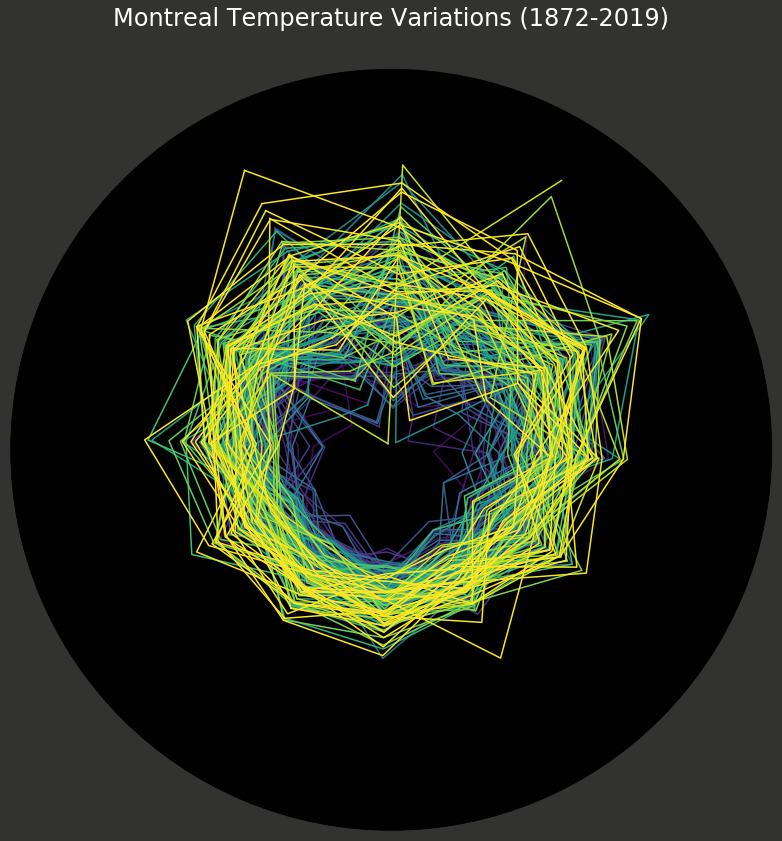

In [15]:
# Plotting temperature variations
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

# Hiding tick labels
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])

# Setting title
ax1.set_title("Montreal Temperature Variations (1872-2019)", color='white', fontdict={'fontsize': 24})

# Setting foreground colour
fig.set_facecolor("#323331")

# Setting background color
ax1.set_facecolor('#000100')

# Setting limit to polar plot by adding padding to max temperature value
ax1.set_ylim(0, 20)

# Setting x coordinates
theta = np.linspace((0.5+2/13)*np.pi, (-1.5+2/13)*np.pi, 13) # 12 equally spaced values

# Getting list of unique values in year column
years = temp_data['year'].unique()

# Plotting all temperatures
for index, year in enumerate(years):
    if year == 1872:
        # Setting y coordinates
        r = temp_data.loc[temp_data['year'] == year, 'mean_temp'] + 7 # plotting temperatures for year 1872, 12 months
    else:
        # Setting y coordinates
        r = temp_data.loc[(temp_data['year'] == year) | ((temp_data['year'] == year-1) & (temp_data['month'] == 12)), 'mean_temp'] + 7 # plotting temperatures for all following years, connecting with month 12 of previous year each time to complete circle
        # ax1.text(0,0, str(year), color='white', size=30, ha='center') # ignoring text to avoid superimposition
        ax1.grid(False) # getting rid of grid
        ax1.plot(theta, r, color = plt.cm.viridis(index*2)) # multiply by 2 to get to yellow colour

### Adding Temperature Rings and Month Labels

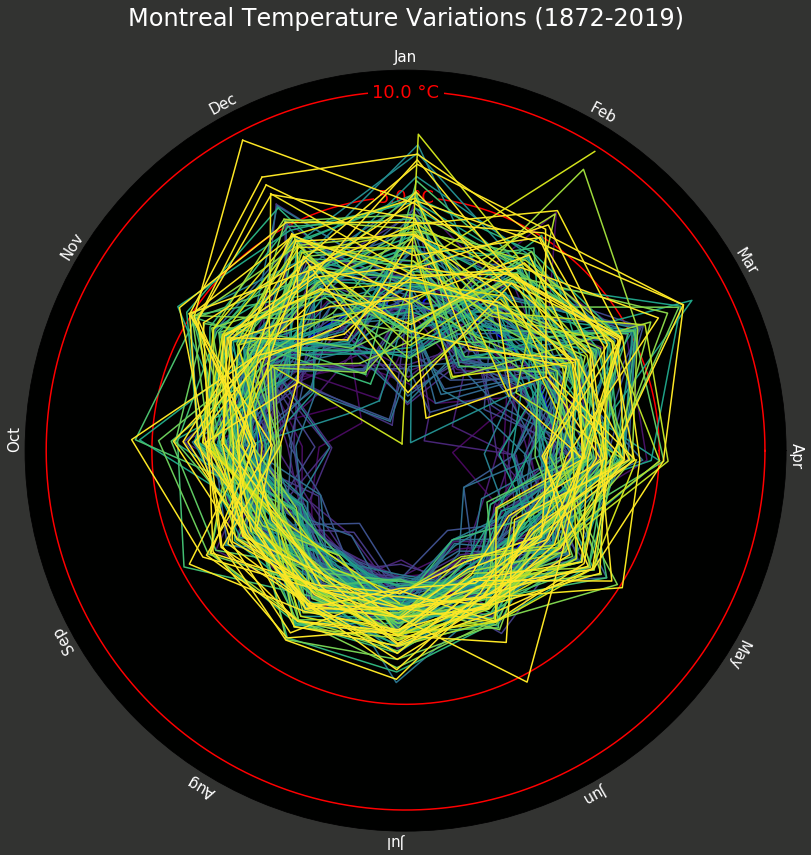

In [16]:
# Plotting temperature variations
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

# Hiding tick labels
# ax1.axes.get_yaxis().set_ticklabels([])
# ax1.axes.get_xaxis().set_ticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])

# Setting title
ax1.set_title("Montreal Temperature Variations (1872-2019)", color='white', fontdict={'fontsize': 24})

# Setting foreground colour
fig.set_facecolor("#323331")

# Setting background color
ax1.set_facecolor('#000100')

# Setting limit to polar plot by adding padding to max temperature value
ax1.set_ylim(0, 18)

# Setting x coordinates
theta = np.linspace((0.5+2/13)*np.pi, (-1.5+2/13)*np.pi, 13) # 12 equally spaced values

# Getting list of unique values in year column
years = temp_data['year'].unique()

# Designing temperature rings
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [7.0]*1000 # ring for 0 degrees, adding 7 for negative adjustment
red_line_two_radii = [12.0]*1000 # ring for 5 degrees, adding 7 for negative adjustment
red_line_three_radii = [17.0]*1000 # ring for 10 degrees, adding 7 for negative adjustment

# Plotting temperature rings
ax1.plot(full_circle_thetas, blue_line_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_line_two_radii, c='red')
ax1.plot(full_circle_thetas, red_line_three_radii, c='red')

# Adding ring text
ax1.text(np.pi/2, 6.6, "0.0 °C", color="blue", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)
ax1.text(np.pi/2, 11.7, "5.0 °C", color="red", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)
ax1.text(np.pi/2, 16.7, "10.0 °C", color="red", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)

# Adding labels for months
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] # listing months
months_angles = np.linspace(0.5*np.pi, (-1.5+2/13)*np.pi, 12) # setting angles for labels
months_position = [18.4, 18.5, 18.5, 18.5, 18.3, 18.5, 18.65, 18.5, 18.4, 18.5, 18.6, 18.6] # setting heights for labels
months_rotation = [0, -28, -58, -90, -115, -150, 180, 150, 120, 90, 58, 28] # setting rotation of labels
for i, month in enumerate(months): # adding labels to each angle
  ax1.text(months_angles[i], months_position[i], month, color = "white", fontsize = 15, ha = "center", rotation = months_rotation[i])

# Plotting all temperatures
for index, year in enumerate(years):
    if year == 1872:
        # Setting y coordinates
        r = temp_data.loc[temp_data['year'] == year, 'mean_temp'] + 7 # plotting temperatures for year 1872, 12 months
    else:
        # Setting y coordinates
        r = temp_data.loc[(temp_data['year'] == year) | ((temp_data['year'] == year-1) & (temp_data['month'] == 12)), 'mean_temp'] + 7 # plotting temperatures for all following years, connecting with month 12 of previous year each time to complete circle
        # ax1.text(0,0, str(year), color='white', size=30, ha='center') # ignoring text to avoid superimposition
        ax1.grid(False) # getting rid of grid
        ax1.plot(theta, r, color = plt.cm.viridis(index*2), zorder = 10) # multiply by 2 to get to yellow colour, zorder lines to go over text

### Creating GIF Animation

/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


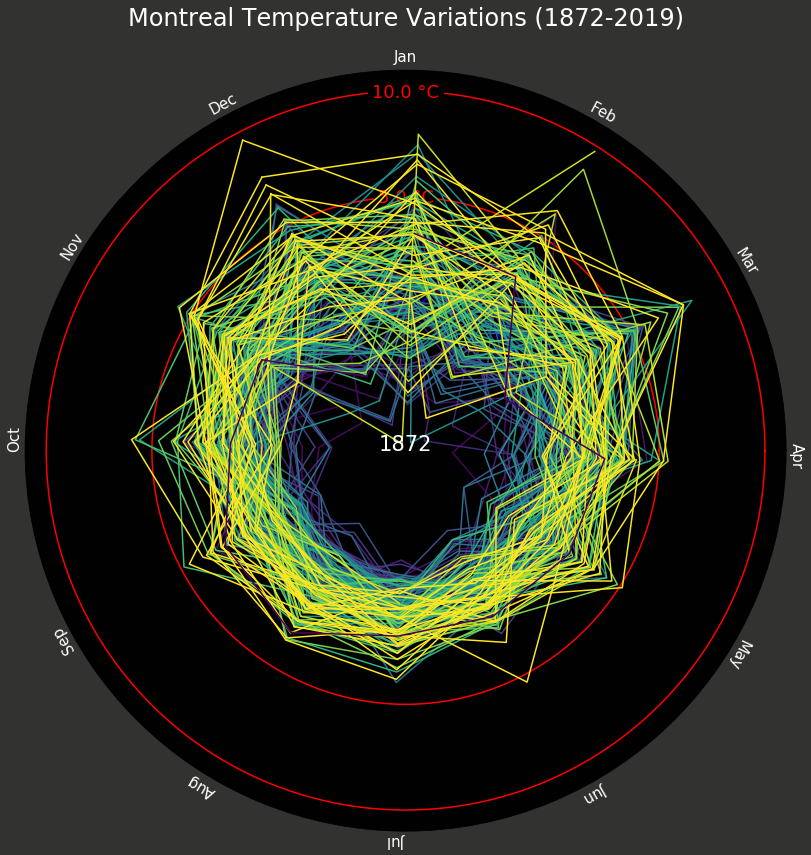

In [17]:
# Importing function to write out animation as GIF file
from matplotlib.animation import FuncAnimation

# Plotting temperature variations
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

# Hiding tick labels
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])

# Setting title
ax1.set_title("Montreal Temperature Variations (1872-2019)", color='white', fontdict={'fontsize': 24})

# Setting foreground colour
fig.set_facecolor("#323331")

# Setting background color
ax1.set_facecolor('#000100')

# Setting limit to polar plot by adding padding to max temperature value
ax1.set_ylim(0, 18)

# Setting x coordinates
theta = np.linspace((0.5+2/13)*np.pi, (-1.5+2/13)*np.pi, 13) # 12 equally spaced values

# Adding null value to month 12 year 1871 in order to simplify complete circles creation
temp_data = pd.concat([pd.DataFrame({'year': [1871], 'month': [12], 'mean_temp': [np.nan]}), temp_data], ignore_index = True)

# Getting list of unique values in year column
years = temp_data.loc[temp_data['year'] > 1871, 'year'].unique()

# Designing temperature rings
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [7.0]*1000 # ring for 0 degrees, adding 7 for negative adjustment
red_line_two_radii = [12.0]*1000 # ring for 5 degrees, adding 7 for negative adjustment
red_line_three_radii = [17.0]*1000 # ring for 10 degrees, adding 7 for negative adjustment

# Plotting temperature rings
ax1.plot(full_circle_thetas, blue_line_one_radii, c = 'blue')
ax1.plot(full_circle_thetas, red_line_two_radii, c = 'red')
ax1.plot(full_circle_thetas, red_line_three_radii, c = 'red')

# Adding ring text
ax1.text(np.pi/2, 6.6, "0.0 °C", color="blue", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)
ax1.text(np.pi/2, 11.7, "5.0 °C", color="red", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)
ax1.text(np.pi/2, 16.7, "10.0 °C", color="red", ha='center', fontdict={'fontsize': 18}, bbox=dict(facecolor='#000100', edgecolor='#000100'), zorder = 2)

# Adding labels for months
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] # listing months
months_angles = np.linspace(0.5*np.pi, (-1.5+2/13)*np.pi, 12) # setting angles for labels
months_position = [18.4, 18.5, 18.5, 18.5, 18.3, 18.5, 18.65, 18.5, 18.4, 18.5, 18.6, 18.6] # setting heights for labels
months_rotation = [0, -28, -58, -90, -115, -150, 180, 150, 120, 90, 58, 28] # setting rotation of labels
for i, month in enumerate(months): # adding labels to each angle
  ax1.text(months_angles[i], months_position[i], month, color = "white", fontsize = 15, ha = "center", rotation = months_rotation[i])

# Creating function to plot all temperatures
def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position() == (0,0)):
        txt.set_visible(False)
    year = years[i] # enumerating years
    r = temp_data.loc[(temp_data['year'] == year) | ((temp_data['year'] == year-1) & (temp_data['month'] == 12)), 'mean_temp'] + 7 # plotting temperatures for all following years, connecting with month 12 of previous year each time to complete circle
    ax1.text(0,0, str(year), color = 'white', size = 21, ha = 'center', zorder = 20) # showing year on top of everything
    ax1.grid(False) # getting rid of grid
    ax1.plot(theta, r, color = plt.cm.viridis(i*2), zorder = 10) # multiply by 2 to get to yellow colour, zorder lines to go over text    
    return ax1

anim = FuncAnimation(fig, update, frames = len(years), interval = 160, repeat = False)

# Saving animation
anim.save('montreal_temperature_spiral.gif', dpi=120, writer='pillow', savefig_kwargs={'facecolor': '#323331'})

### Next Steps

There were missing values identified for the years 1993 to 1996 (inclusive). These values will need to be imputed using nearby weather station data.